In [1]:
from IPython.display import Image

In [2]:
Image(filename='')

ValueError: Cannot embed the '' image format

In [57]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


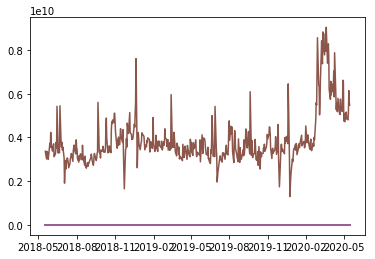

In [58]:
sp500 = pd.read_csv("^GSPC.csv", index_col=0, parse_dates=True)
plot(sp500)

In [59]:
sp500.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-18,2717.350098,2719.500000,2709.179932,2712.969971,2712.969971,3368690000
2018-05-21,2735.389893,2739.189941,2725.699951,2733.010010,2733.010010,3019890000


In [60]:
sptt = sp500[["Adj Close"]]
sptt.head(1)

,Adj Close
Date,
2018-05-18,2712.969971


In [61]:
sptt.tail(2)

,Adj Close
Date,
2020-05-14,2852.500000
2020-05-15,2863.699951


In [62]:
sp500.index

DatetimeIndex(['2018-05-18', '2018-05-21', '2018-05-22', '2018-05-23',
               '2018-05-24', '2018-05-25', '2018-05-29', '2018-05-30',
               '2018-05-31', '2018-06-01',
               ...
               '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None)

## Q1. Which days did the market go up or down?

In [63]:
def rel_change(x):
    return (x[1]-x[0])/x[0]

In [10]:
sptt.assign?

In [64]:
sptt = sptt.assign(UpDown= pd.rolling_apply(sptt, 2, rel_change))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  """Entry point for launching an IPython kernel.


In [65]:
sptt.iloc[0:10]

,Adj Close,UpDown
Date,,
2018-05-18,2712.969971,NaN
2018-05-21,2733.010010,0.007387
2018-05-22,2724.439941,-0.003136
2018-05-23,2733.290039,0.003248
2018-05-24,2727.760010,-0.002023
2018-05-25,2721.330078,-0.002357
2018-05-29,2689.860107,-0.011564
2018-05-30,2724.010010,0.012696
2018-05-31,2705.270020,-0.006880


In [66]:
sptt.tail()

,Adj Close,UpDown
Date,,
2020-05-11,2930.189941,0.000133
2020-05-12,2870.120117,-0.020500
2020-05-13,2820.000000,-0.017463
2020-05-14,2852.500000,0.011525
2020-05-15,2863.699951,0.003926


In [67]:
# If Date was descending order use shift 
# Not for this data but for pracice
sptt.UpDown = sptt.UpDown.shift(+1)

## Q2. Which day of the week corresponds to each row?

In [68]:
sptt.index

DatetimeIndex(['2018-05-18', '2018-05-21', '2018-05-22', '2018-05-23',
               '2018-05-24', '2018-05-25', '2018-05-29', '2018-05-30',
               '2018-05-31', '2018-06-01',
               ...
               '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None)

In [69]:
dir(sptt.index)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__inv__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__unicode__',
 '__weakref__',
 '__xor__',
 '_add_comparison_methods',
 '_add_datelike',
 '_add_datetimelike_methods',
 '_add_d

In [70]:
sptt['day_num'] = sptt.index.dayofweek
sptt['day_name']= sptt.index.weekday_name

In [27]:
sptt.head()

,Adj Close,UpDown,day_num,day_name,itdd
Date,,,,,
2019-05-20,2840.229980,NaN,0,Monday,NaN
2019-05-21,2864.360107,0.008496,1,Tuesday,NaN
2019-05-22,2856.270020,-0.002824,2,Wednesday,NaN
2019-05-23,2822.239990,-0.011914,3,Thursday,0.0
2019-05-24,2826.060059,0.001354,4,Friday,0.0


In [71]:
weekday_avg = sptt['Adj Close'].groupby(sptt.index.weekday_name).mean()

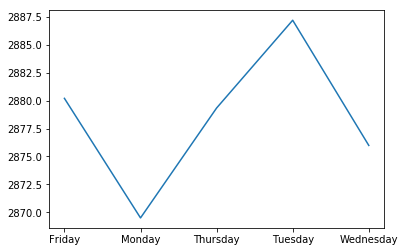

In [72]:
plot(weekday_avg)

In [73]:
def last_three_days_down(x) :
    if x[-1]<=0 and x[-2]<=0 and x[-3]<=0 :
        return 1
    else:
        return 0

In [74]:
sptt['itdd'] = pd.rolling_apply(sptt["UpDown"], 3, last_three_days_down)
sptt.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  """Entry point for launching an IPython kernel.


,Adj Close,UpDown,day_num,day_name,itdd
Date,,,,,
2018-05-18,2712.969971,NaN,4,Friday,NaN
2018-05-21,2733.010010,NaN,0,Monday,NaN
2018-05-22,2724.439941,0.007387,1,Tuesday,NaN
2018-05-23,2733.290039,-0.003136,2,Wednesday,NaN
2018-05-24,2727.760010,0.003248,3,Thursday,0.0
2018-05-25,2721.330078,-0.002023,4,Friday,0.0
2018-05-29,2689.860107,-0.002357,1,Tuesday,0.0
2018-05-30,2724.010010,-0.011564,2,Wednesday,1.0
2018-05-31,2705.270020,0.012696,3,Thursday,0.0


In [75]:
sptt.tail()

,Adj Close,UpDown,day_num,day_name,itdd
Date,,,,,
2020-05-11,2930.189941,0.016872,0,Monday,0.0
2020-05-12,2870.120117,0.000133,1,Tuesday,0.0
2020-05-13,2820.000000,-0.020500,2,Wednesday,0.0
2020-05-14,2852.500000,-0.017463,3,Thursday,0.0
2020-05-15,2863.699951,0.011525,4,Friday,0.0


In [82]:
len(sptt)

502

In [77]:
sptt.head()

,Adj Close,UpDown,day_num,day_name,itdd
Date,,,,,
2018-05-18,2712.969971,NaN,4,Friday,NaN
2018-05-21,2733.010010,NaN,0,Monday,NaN
2018-05-22,2724.439941,0.007387,1,Tuesday,NaN
2018-05-23,2733.290039,-0.003136,2,Wednesday,NaN
2018-05-24,2727.760010,0.003248,3,Thursday,0.0


In [78]:
sptt['turned'] = (sptt['itdd'] > 0.) & (sptt['UpDown'] > 0.)

In [79]:
sptt.head()

,Adj Close,UpDown,day_num,day_name,itdd,turned
Date,,,,,,
2018-05-18,2712.969971,NaN,4,Friday,NaN,False
2018-05-21,2733.010010,NaN,0,Monday,NaN,False
2018-05-22,2724.439941,0.007387,1,Tuesday,NaN,False
2018-05-23,2733.290039,-0.003136,2,Wednesday,NaN,False
2018-05-24,2727.760010,0.003248,3,Thursday,0.0,False


In [80]:
sp_turning_days_totals = sptt.turned.groupby(sptt.index.dayofweek).sum()

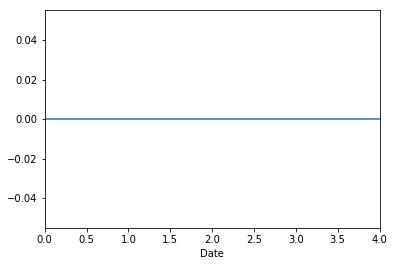

In [81]:
sp_turning_days_totals.plot()

In [49]:
sp_turning_days_totals

Date
0    False
1    False
2    False
3    False
4    False
Name: turned, dtype: bool